<a href="https://colab.research.google.com/github/jairomartinezgiraldo/Algoritmo_Opt/blob/main/Actividad_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/
Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
100% 445M/447M [00:04<00:00, 104MB/s]
100% 447M/447M [00:04<00:00, 111MB/s]
Total de clases: 47
Clases encontradas:
['Bitilasana', 'Vasisthasana', 'Parsvottanasana', 'Phalakasana', 'Virabhadrasana One', 'Setu Bandha Sarvangasana', 'Upavistha Konasana', 'Pincha Mayurasana', 'Parsva Virabhadrasana', 'Virabhadrasana Two', 'Ardha Pincha Mayurasana', 'Sivasana', 'Camatkarasana', 'Trikonasana', 'Halasana', 'Balasana', 'Utthita Hasta Padangusthasana', 'Hanumanasana', 'Dhanurasana', 'Urdhva Dhanurasana', 'Vrksasana', 'Paschimottanasana', 'Utthita Parsvakonasana', 'Ustrasana', 'Supta Kapotasana', 'Salamba Sarvangasana', 'Ardha Navasana', 'Salamba Bhujangasana', 'Navasana', 'Utkatasana', 'Padmasana', 'Ardha Matsyendrasana', 'Ardha Chandrasana', 'Ashta Chandrasana', 'Baddha Konasana', 'Marjaryasana', 'Eka Pada Rajakapotasana', 'Adho Mukha Vrksasana', 'Urdhva Mukha Svsnssan

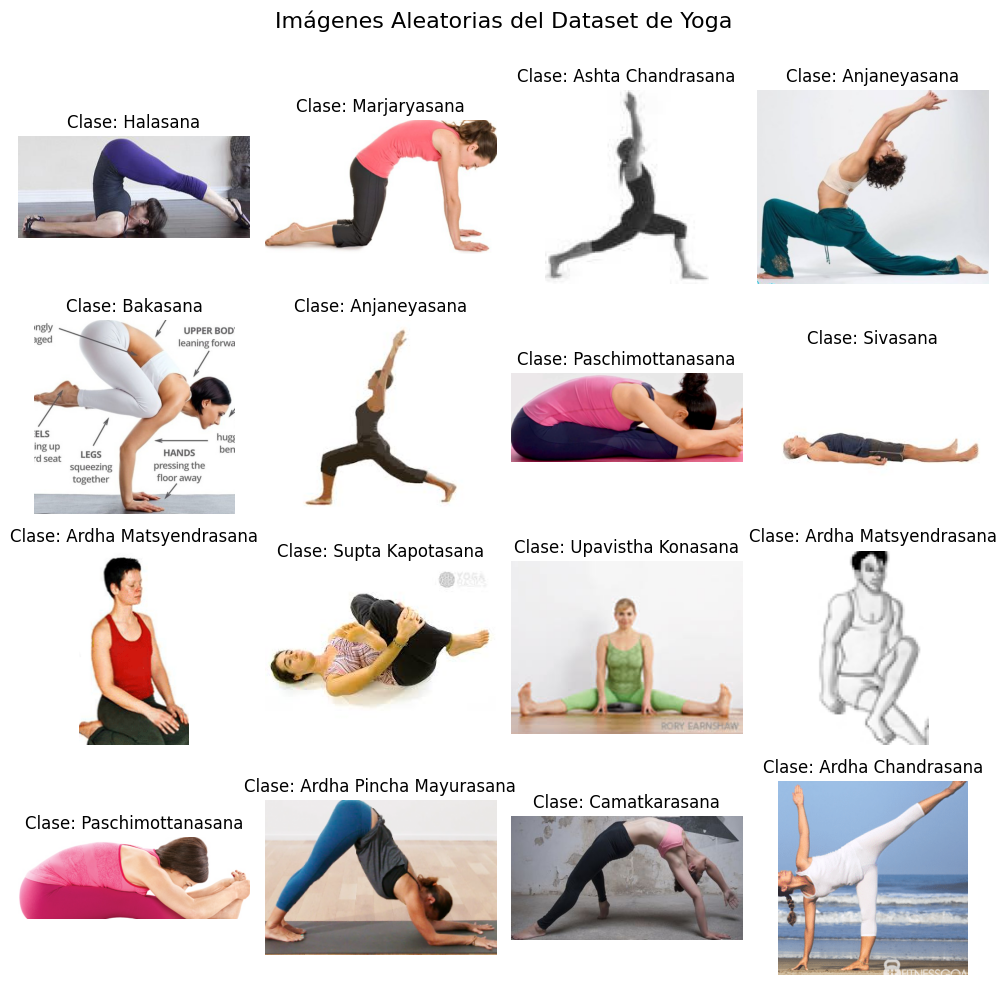

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Tamaño del conjunto de datos: (2758, 224, 224, 3), (2758,)
Tamaño de X_train: (2206, 224, 224, 3), y_train: (2206, 47)
Tamaño de X_val: (552, 224, 224, 3), y_val: (552, 47)


In [2]:
# Paso 1: Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

BASE_FOLDER = '/content/drive/My Drive/YogaPoseClassification/'  # Asegúrate de que la carpeta del proyecto esté en Google Drive

# Paso 2: Descargar el Dataset de Yoga
!mkdir -p /content/my_dataset


# Descargar el dataset de Kaggle
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

# Descomprimir el dataset
tar_file_path = '/content/yoga-posture-dataset.zip'
import zipfile
zip_ref = zipfile.ZipFile(tar_file_path, 'r')
zip_ref.extractall('/content/my_dataset')
zip_ref.close()

# Paso 3: Analizar el Dataset
import os

# Definir la ruta base del dataset
base_dir = '/content/my_dataset'

# Verificar las subcarpetas dentro del dataset
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
print(f"Total de clases: {len(subfolders)}")
print("Clases encontradas:")
print(subfolders)

# Contar el número de imágenes en cada clase
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Clase: {subfolder}, Número de imágenes: {num_images}")

# Paso 4: Visualizar Imágenes Aleatorias
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Mostrar una cuadrícula de imágenes aleatorias
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Imágenes Aleatorias del Dataset de Yoga', fontsize=16)

for ax in axes.flatten():
    # Seleccionar una subcarpeta aleatoria
    chosen_folder = np.random.choice(subfolders)
    subfolder_path = os.path.join(base_dir, chosen_folder)

    # Escoger un índice aleatorio entre las imágenes disponibles en la subcarpeta seleccionada
    img_name = np.random.choice(os.listdir(subfolder_path))
    img_path = os.path.join(subfolder_path, img_name)

    # Cargar la imagen y convertirla a RGB
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Clase: {chosen_folder}")
    else:
        ax.set_title('Imagen no encontrada')
        ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Paso 5: Preparar el Dataset para el Entrenamiento
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Definir el tamaño de las imágenes (ejemplo: 224x224)
IMG_SIZE = (224, 224)

# Crear listas para almacenar imágenes y etiquetas
X, y = [], []

# Listar todas las clases (subcarpetas)
class_names = subfolders

# Cargar las imágenes y sus etiquetas
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpeg', '.jpg', '.gif'))]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionar
        img_array = img_to_array(img)  # Convertir a array
        X.append(img_array)
        y.append(class_idx)

# Convertir las listas a arrays de NumPy
X = np.array(X)
y = np.array(y)

print(f'Tamaño del conjunto de datos: {X.shape}, {y.shape}')

# Paso 6: Dividir el Dataset en Entrenamiento y Validación
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Aplicar One-Hot Encoding a las etiquetas
y = to_categorical(y, num_classes=len(class_names))

# Dividir en entrenamiento y validación (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño de X_val: {X_val.shape}, y_val: {y_val.shape}')

# Normalizar las imágenes usando imagenet_utils
from tensorflow.keras.applications import imagenet_utils
X_train = imagenet_utils.preprocess_input(X_train)
X_val = imagenet_utils.preprocess_input(X_val)



In [3]:

# Paso 7: Crear y Entrenar el Modelo con MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Definir la entrada del modelo
input_tensor = Input(shape=(224, 224, 3))

# Cargar MobileNetV2 sin las capas superiores
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False  # Congelar capas convolucionales

# Añadir capas superiores personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Clasificador softmax
output_tensor = Dense(len(class_names), activation='softmax')(x)

# Crear el modelo completo
# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model = Model(inputs=base_model.input, outputs=output_tensor)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()



<ipython-input-3-a5e5e4f98731>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,663,791 (10.16 MB)

 Trainable params: 405,807 (1.55 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 297ms/step - accuracy: 0.0262 - loss: 4.1725 - val_accuracy: 0.0580 - val_loss: 3.7749
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0486 - loss: 3.7598 - val_accuracy: 0.1123 - val_loss: 3.6774
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0786 - loss: 3.6065 - val_accuracy: 0.1504 - val_loss: 3.5358
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1274 - loss: 3.5291 - val_accuracy: 0.2047 - val_loss: 3.3581
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1859 - loss: 3.2707 - val_accuracy: 0.2627 - val_loss: 3.1456
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2211 - loss: 2.9800 - val_accuracy: 0.2862 - val_loss: 2.9897
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2627 - loss: 2.8416 - val_accuracy: 0.3442 - val_loss: 2.7803
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3268 - loss: 2.5227 - val_accuracy: 0.3370 -

Pérdida en validación: 1.5831490755081177, Precisión en validación: 0.570652186870575
[INFO]: Evaluando el modelo...
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step
                               precision    recall  f1-score   support

                   Bitilasana       0.67      0.53      0.59        15
                 Vasisthasana       0.41      0.41      0.41        17
              Parsvottanasana       0.45      0.56      0.50         9
                  Phalakasana       0.71      0.59      0.65        17
           Virabhadrasana One       0.42      0.67      0.52        12
     Setu Bandha Sarvangasana       0.60      0.50      0.55        12
           Upavistha Konasana       0.67      0.50      0.57         4
            Pincha Mayurasana       0.36      0.31      0.33        16
        Parsva Virabhadrasana       0.25      0.25      0.25         4
           Virabhadrasana Two       0.86      0.86      0.86        14
      Ardha Pincha Mayurasana       0.36      0.56      0.43

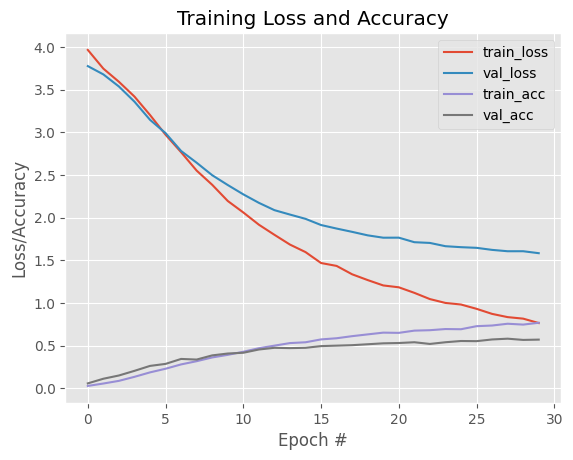

In [4]:
# Paso 8: Entrenar el Modelo Inicial
from sklearn.utils import class_weight

# Calcular los pesos de las clases para equilibrar el dataset
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y.argmax(axis=1)), y=y.argmax(axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1,
    class_weight=class_weights_dict
)

# Paso 9: Evaluar el Modelo
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Pérdida en validación: {val_loss}, Precisión en validación: {val_accuracy}')

# Almacenar el modelo empleando la función model.save de Keras
model.save(BASE_FOLDER + "yoga_pose_model_mobilenetv2.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
from sklearn.metrics import classification_report

# Efectuamos la predicción
predictions = model.predict(X_val, batch_size=32)
# Generar el reporte de clasificación
print(classification_report(y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))

# Graficar la pérdida y la precisión del entrenamiento
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [5]:
# Paso 10: Entrenar el Modelo con Data Augmentation Más Suave
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth
from tensorflow.keras.callbacks import EarlyStopping

# Crear generadores de datos con Data Augmentation más suave
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Aplicar las nuevas transformaciones de Data Augmentation
augmentation_layers = [
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2)
]

# Crear los generadores
train_generator = train_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


val_generator = train_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Entrenar el Modelo con Data Augmentation y aplicar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_aug = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# Evaluación del modelo después del entrenamiento con Data Augmentation
print("[INFO]: Evaluando el modelo con Data Augmentation...")
predictions_aug = model.predict(val_generator, batch_size=32)
print(classification_report(y_val.argmax(axis=1), predictions_aug.argmax(axis=1), target_names=class_names))

# Graficar la pérdida y la precisión del entrenamiento con Data Augmentation
plt.style.use("ggplot")
plt.figure()
plt.plot(history_aug.history["loss"], label="train_loss_aug")
plt.plot(history_aug.history["val_loss"], label="val_loss_aug")
plt.plot(history_aug.history["accuracy"], label="train_acc_aug")
plt.plot(history_aug.history["val_accuracy"], label="val_acc_aug")
plt.title("Training Loss and Accuracy with Data Augmentation")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'